In [1]:
# Python Project: Books Data Scraping & Analysis

In [3]:
# Data scraping and handling
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


In [4]:
# Define Scraping Function
def scrape_books_simple(url):
    books_list = []

    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        name = book.h3.a['title']

        price_text = book.find("p", class_="price_color").text
        price_number = re.findall(r"[\d\.]+", price_text)[0]
        price = float(price_number)

        rating_class = book.find("p", class_="star-rating")["class"][1]
        rating_dict = {"One":1, "Two":2, "Three":3, "Four":4, "Five":5}
        rating = rating_dict.get(rating_class, 0)

        availability = book.find("p", class_="instock availability").text.strip()

        # For testing, assign the main category
        category = "Books"

        books_list.append({
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Availability": availability,
            "Category": category
        })

    return books_list


In [9]:
#Scrape First 4 Pages
all_books = []
base_url = "http://books.toscrape.com/catalogue/category/books_1/page-{}.html"

for page in range(1, 5):
    url = base_url.format(page)
    print(f"Scraping page {page} ...")
    books = scrape_books_simple(url)
    all_books.extend(books)
    time.sleep(1)

df = pd.DataFrame(all_books)
print(f"Total books scraped: {len(df)}")


Scraping page 1 ...
Scraping page 2 ...
Scraping page 3 ...
Scraping page 4 ...
Total books scraped: 80


In [10]:
#Save Data to CSV
df = pd.DataFrame(all_books)
df.to_csv("books_first_4_pages.csv", index=False)
print("Data saved to books_first_4_pages.csv")
df.head()



Data saved to books_first_4_pages.csv


,Name,Price,Rating,Availability,Category
0,A Light in the Attic,51.77,3,In stock,Books
1,Tipping the Velvet,53.74,1,In stock,Books
2,Soumission,50.10,1,In stock,Books
3,Sharp Objects,47.82,4,In stock,Books
4,Sapiens: A Brief History of Humankind,54.23,5,In stock,Books


In [13]:
#Basic Data Exploration
# Check missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())

# Top 10 categories by number of books
print(df['Category'].value_counts().head(10))


Name            0
Price           0
Rating          0
Availability    0
Category        0
dtype: int64
           Price     Rating
count  80.000000  80.000000
mean   35.708375   2.987500
std    14.196145   1.436361
min    12.840000   1.000000
25%    22.575000   2.000000
50%    35.955000   3.000000
75%    50.142500   4.000000
max    58.110000   5.000000
Category
Books    80
Name: count, dtype: int64


In [15]:
#Top 10 Most Expensive Books
top_expensive = df.sort_values(by="Price", ascending=False).head(10)
top_expensive[['Name','Price','Rating','Category']]


,Name,Price,Rating,Category
68,The Death of Humanity: and the Case for Life,58.11,4,Books
40,Slow States of Collapse: Poems,57.31,3,Books
15,Our Band Could Be Your Life: Scenes from the A...,57.25,3,Books
58,The Past Never Ends,56.50,4,Books
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1,Books
56,The Secret of Dreadwillow Carse,56.13,1,Books
67,The Electric Pencil: Drawings from Inside Stat...,56.06,1,Books
25,Birdsong: A Story in Pictures,54.64,3,Books
4,Sapiens: A Brief History of Humankind,54.23,5,Books
61,The Murder That Never Was (Forensic Instincts #5),54.11,3,Books


In [17]:
#Top 10 Highest Rated Books
top_rated = df.sort_values(by="Rating", ascending=False).head(10)
top_rated[['Name','Rating','Price','Category']]


,Name,Rating,Price,Category
43,#HigherSelfie: Wake Up Your Life. Free Your So...,5,23.11,Books
12,Set Me Free,5,17.46,Books
30,The Four Agreements: A Practical Guide to Pers...,5,17.66,Books
28,Worlds Elsewhere: Journeys Around Shakespeareâ...,5,40.30,Books
54,Thirst,5,17.27,Books
24,Black Dust,5,34.53,Books
23,Chase Me (Paris Nights #2),5,25.27,Books
34,Sophie's World,5,15.94,Books
42,Private Paris (Private #10),5,47.61,Books
32,The Elephant Tree,5,23.82,Books


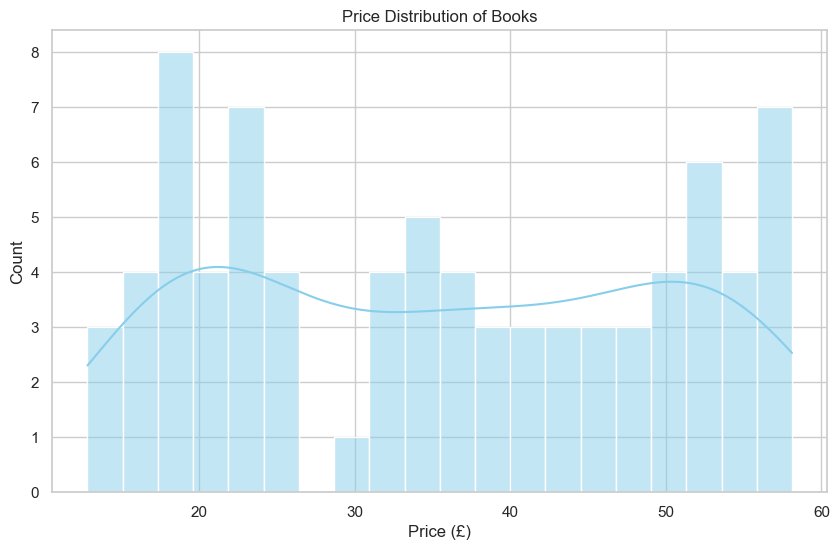

In [19]:
#Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()


C:\Users\SAKSHI LATE\AppData\Local\Temp\ipykernel_17340\1870070293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


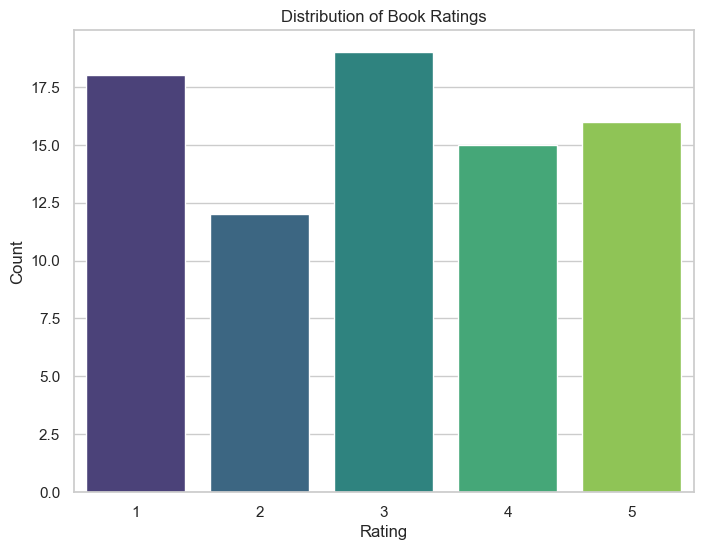

In [21]:
#Rating Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


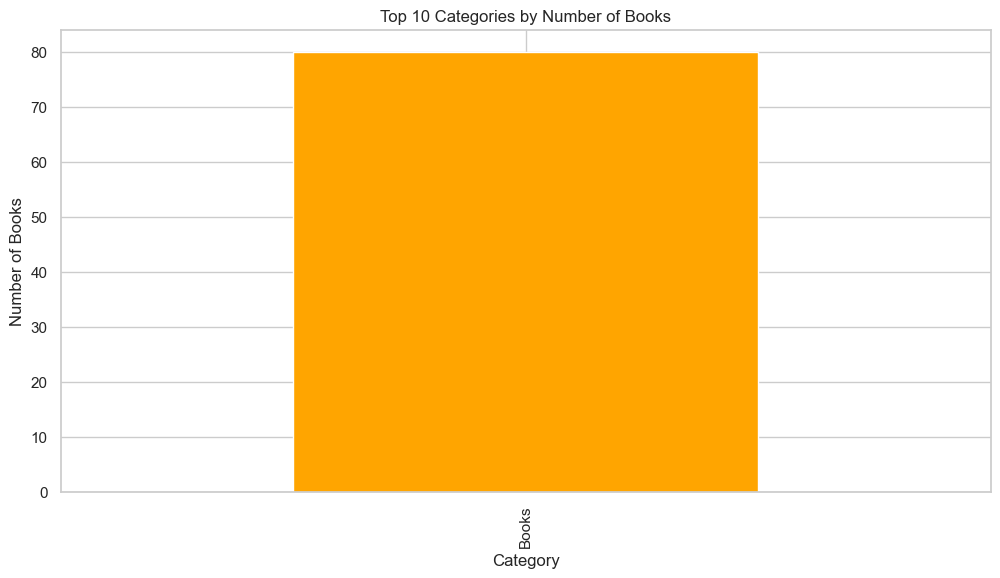

In [23]:
#Category Distribution (Top 10
plt.figure(figsize=(12,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Categories by Number of Books")
plt.ylabel("Number of Books")
plt.show()


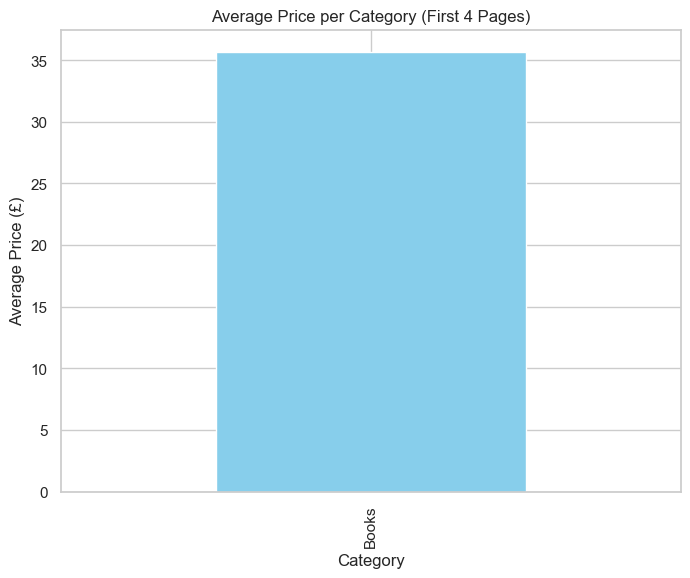

Category
Books    35.708375
Name: Price, dtype: float64


In [25]:
#Average Price per Category
avg_price_cat = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
avg_price_cat.plot(kind='bar', color='skyblue')
plt.title("Average Price per Category (First 4 Pages)")
plt.ylabel("Average Price (£)")
plt.show()

# Also print the values
print(avg_price_cat)

